# Project Phase 2 - Gender & Speaker Recognition

Importing libraries

In [1]:
import os
import sys
import python_speech_features as mfcc
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
import numpy as np
import glob
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Functions to get feature vectors

In [2]:
def get_MFCC(audio, sr):
    features = mfcc.mfcc(audio, sr, 0.025, 0.01, 13, appendEnergy = True)
    return np.mean(features, axis=0)

In [3]:
def get_features(data):
    x, m = np.shape(data)
    In = []
    Out = []
    for i in range (x):
        In = data[i]
        feature = get_MFCC(In[1], In[0])
        Out.append(feature) 
    Out = np.insert(Out, 0, 1, axis=1)
    return Out

# Gender Data

Made 6 np arrays:
- gtrain_X & gtrain_Y
- gtest_X & gtest_Y
- gvalid_X & gvalid_Y

X data sets have 14 features in reach row for each input .wav file

Y data has corresponding speaker (2 classes - 0 and 1)

In [4]:
suffix = "_F";
train = []
gtrain_Y = []
train_list = glob.glob(os.path.join(os.getcwd(), "Gender_Recognition/Train"))
for train_path in train_list:
    for subdir, dirs, files in os.walk(train_path):
        for file in files:
            filepath = subdir + os.sep + file
            if os.path.dirname(filepath).endswith(suffix):
                temp = 1;
            else:
                temp = 0;
            if filepath.endswith(".wav"):
                with open(filepath) as train_input:
                    train.append(read(filepath))
                    gtrain_Y.append(temp)

In [5]:
test = []
gtest_Y = []
test_list = glob.glob(os.path.join(os.getcwd(), "Gender_Recognition/Test"))
for test_path in test_list:
    for subdir, dirs, files in os.walk(test_path):
        for file in files:
            filepath = subdir + os.sep + file
            if os.path.dirname(filepath).endswith(suffix):
                temp = 1;
            else:
                temp = 0;
            if filepath.endswith(".wav"):
                with open(filepath) as test_input:
                    test.append(read(filepath))
                    gtest_Y.append(temp)

In [6]:
valid = []
gvalid_Y = []
valid_list = glob.glob(os.path.join(os.getcwd(), "Gender_Recognition/Valid"))
for valid_path in valid_list:
    for subdir, dirs, files in os.walk(valid_path):
        for file in files:
            filepath = subdir + os.sep + file
            if os.path.dirname(filepath).endswith(suffix):
                temp = 1;
            else:
                temp = 0;
            if filepath.endswith(".wav"):
                with open(filepath) as test_input:
                    valid.append(read(filepath))
                    gvalid_Y.append(temp)

In [7]:
gtrain_X = get_features(train)
gtest_X = get_features(test)
gvalid_X = get_features(valid)

c:\users\talha\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


# Speaker Data

Made 6 np arrays:
- strain_X & strain_Y
- stest_X & stest_Y
- svalid_X & svalid_Y

X data sets have 14 features in reach row for each input .wav file

Y data has corresponding speaker (142 classes - 0 to 141)

In [8]:
train = []
trainY = []
train_list = glob.glob(os.path.join(os.getcwd(), "Speaker_Recognition/Train"))
for train_path in train_list:
    for subdir, dirs, files in os.walk(train_path):
        for file in files:
            filepath = subdir + os.sep + file
            direc = os.path.dirname(filepath)
            direc = direc[-5:]
            temp = direc[:-2]
            if filepath.endswith(".wav"):
                with open(filepath) as train_input:
                    train.append(read(filepath))
                    trainY.append(temp)
trainY = list(map(int, trainY)) 

In [9]:
test = []
testY = []
test_list = glob.glob(os.path.join(os.getcwd(), "Speaker_Recognition/Test"))
for test_path in test_list:
    for subdir, dirs, files in os.walk(test_path):
        for file in files:
            filepath = subdir + os.sep + file
            direc = os.path.dirname(filepath)
            direc = direc[-5:]
            temp = direc[:-2]
            if filepath.endswith(".wav"):
                with open(filepath) as test_input:
                    test.append(read(filepath))
                    testY.append(temp)
testY = list(map(int, testY)) 

In [10]:
valid = []
validY = []
valid_list = glob.glob(os.path.join(os.getcwd(), "Speaker_Recognition/Valid"))
for valid_path in valid_list:
    for subdir, dirs, files in os.walk(valid_path):
        for file in files:
            filepath = subdir + os.sep + file
            direc = os.path.dirname(filepath)
            direc = direc[-5:]
            temp = direc[:-2]
            if filepath.endswith(".wav"):
                with open(filepath) as test_input:
                    valid.append(read(filepath))
                    validY.append(temp)
validY = list(map(int, validY)) 

In [11]:
svalid_Y = np.array(validY) - 1
stest_Y = np.array(testY) - 1
strain_Y = np.array(trainY) - 1

In [12]:
strain_X = get_features(train)
stest_X = get_features(test)
svalid_X = get_features(valid)

# Functions for Logistic Regression

- Softmax
- Loss computation
- One Hot vector 
- Compute Gradient
- Gradient Descent
- Prediction
- Evaluation

In [13]:
def softmax(x, theta):
    z = np.dot(x, theta) 
    z = z - np.max(z)     #improves the stability of the function for large dataset
    e_z = (np.exp(z.T) / np.sum(np.exp(z), axis = 1)).T
    return e_z
    
def Loss(theta, x, y):
    m = x.shape[0]
    epsilon = sys.float_info.epsilon
    prob = softmax(x, theta) 
    loss = -np.sum(np.multiply(y, np.log(prob + epsilon)))  
    return loss/m

In [14]:
def oneHot(vector, num_classes):
    one_hot = np.zeros(shape = (len(vector), num_classes))
    one_hot[np.arange(len(vector)), vector] = 1
    return one_hot.astype(int)

def compute_gradient(theta, X, y):
    h = softmax(X, theta)
    gradient = np.dot(X.T, (h - y))
    return gradient

In [15]:
def gradient_descent(n_epoch, alpha, X, Y, classes):
    m = X.shape[0]
    losses = []
    y_mat = oneHot(Y, classes)
    theta = np.ones((X.shape[1], classes))
    for epoch in range(n_epoch):
        loss = Loss(theta, X, y_mat)
        losses.append(loss)
        gradient = compute_gradient(theta, X, y_mat)
        theta -= (alpha * gradient/m)
    return losses,theta

In [16]:
def prediction(x, theta):
    z = softmax(x, theta)
    preds = np.argmax(z,axis=1)
    return preds

def evaluation(test_Y, result):
    print('Accuracy is: ', accuracy_score(result, test_Y)*100,'%')
    print('Confusion Matrix is:') 
    print(confusion_matrix(result, test_Y))
    print(classification_report(test_Y, result))
    return None

# Gender Recognition

In [17]:
gclasses = 2
gn_epoch = 600

Validation Losses for different values of alpha calculated

In [18]:
alpha = 0.10
gvalid_loss1, gtheta1 = gradient_descent(gn_epoch, alpha, gvalid_X, gvalid_Y, gclasses)

In [19]:
alpha = 0.05
gvalid_loss2, gtheta2 = gradient_descent(gn_epoch, alpha, gvalid_X, gvalid_Y, gclasses)

In [20]:
alpha = 0.01
gvalid_loss3, gtheta3 = gradient_descent(gn_epoch, alpha, gvalid_X, gvalid_Y, gclasses)

In [21]:
alpha = 0.008
gvalid_loss4, gtheta4 = gradient_descent(gn_epoch, alpha, gvalid_X, gvalid_Y, gclasses)

In [22]:
alpha = 0.003
gvalid_loss5, gtheta5 = gradient_descent(gn_epoch, alpha, gvalid_X, gvalid_Y, gclasses)

Training Losses and evaluation for different values of alpha calculated

In [23]:
alpha = 0.1
gtrain_loss1, gtheta_train1 = gradient_descent(gn_epoch, alpha, gtrain_X, gtrain_Y, gclasses)
gpred1 = prediction(gvalid_X, gtheta_train1)
evaluation(gvalid_Y, gpred1)

Accuracy is:  86.47058823529412 %
Confusion Matrix is:
[[113   6]
 [ 17  34]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       130
           1       0.67      0.85      0.75        40

    accuracy                           0.86       170
   macro avg       0.81      0.86      0.83       170
weighted avg       0.88      0.86      0.87       170



In [24]:
alpha = 0.05
gtrain_loss2, gtheta_train2 = gradient_descent(gn_epoch, alpha, gtrain_X, gtrain_Y, gclasses)
gpred2 = prediction(gvalid_X, gtheta_train1)
evaluation(gvalid_Y, gpred2)

Accuracy is:  86.47058823529412 %
Confusion Matrix is:
[[113   6]
 [ 17  34]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       130
           1       0.67      0.85      0.75        40

    accuracy                           0.86       170
   macro avg       0.81      0.86      0.83       170
weighted avg       0.88      0.86      0.87       170



In [25]:
alpha = 0.01
gtrain_loss3, gtheta_train3 = gradient_descent(gn_epoch, alpha, gtrain_X, gtrain_Y, gclasses)
gpred3 = prediction(gvalid_X, gtheta_train1)
evaluation(gvalid_Y, gpred3)

Accuracy is:  86.47058823529412 %
Confusion Matrix is:
[[113   6]
 [ 17  34]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       130
           1       0.67      0.85      0.75        40

    accuracy                           0.86       170
   macro avg       0.81      0.86      0.83       170
weighted avg       0.88      0.86      0.87       170



In [26]:
alpha = 0.008
gtrain_loss4, gtheta_train4 = gradient_descent(gn_epoch, alpha, gtrain_X, gtrain_Y, gclasses)
gpred4 = prediction(gvalid_X, gtheta_train1)
evaluation(gvalid_Y, gpred4)

Accuracy is:  86.47058823529412 %
Confusion Matrix is:
[[113   6]
 [ 17  34]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       130
           1       0.67      0.85      0.75        40

    accuracy                           0.86       170
   macro avg       0.81      0.86      0.83       170
weighted avg       0.88      0.86      0.87       170



In [27]:
alpha = 0.003
gtrain_loss5, gtheta_train5 = gradient_descent(gn_epoch, alpha, gtrain_X, gtrain_Y, gclasses)
gpred5 = prediction(gvalid_X, gtheta_train1)
evaluation(gvalid_Y, gpred5)

Accuracy is:  86.47058823529412 %
Confusion Matrix is:
[[113   6]
 [ 17  34]]
              precision    recall  f1-score   support

           0       0.95      0.87      0.91       130
           1       0.67      0.85      0.75        40

    accuracy                           0.86       170
   macro avg       0.81      0.86      0.83       170
weighted avg       0.88      0.86      0.87       170



Plotting training and validation losses

Text(0.5, 1.0, 'Training loss vs Epoch for different values of Alpha')

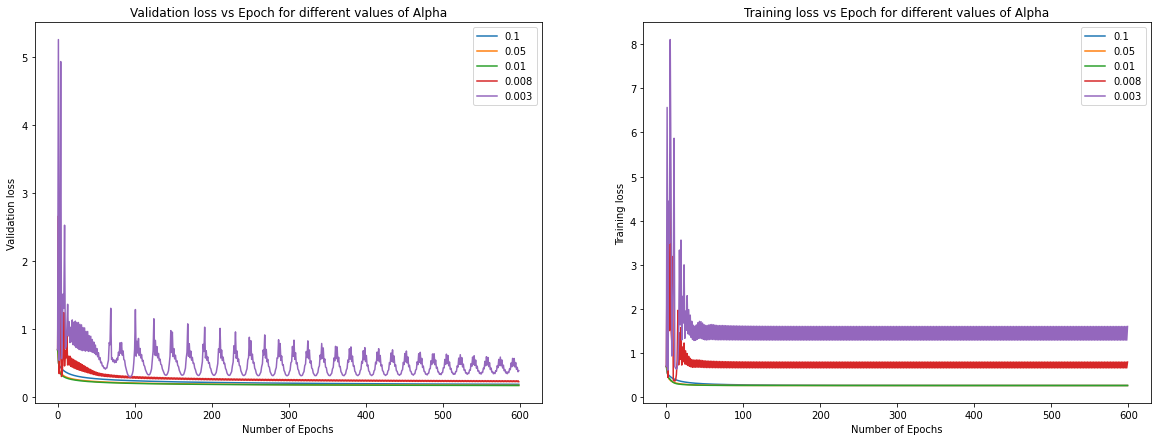

In [28]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(gvalid_loss5)
plt.plot(gvalid_loss4)
plt.plot(gvalid_loss3)
plt.plot(gvalid_loss2)
plt.plot(gvalid_loss1)
plt.legend(('0.1', '0.05', '0.01', '0.008','0.003'))
plt.xlabel('Number of Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss vs Epoch for different values of Alpha')

plt.subplot(1,2,2)
plt.plot(gtrain_loss5)
plt.plot(gtrain_loss4)
plt.plot(gtrain_loss3)
plt.plot(gtrain_loss2)
plt.plot(gtrain_loss1)
plt.legend(('0.1', '0.05', '0.01', '0.008','0.003'))
plt.xlabel('Number of Epochs')
plt.ylabel('Training loss')
plt.title('Training loss vs Epoch for different values of Alpha')

Testing with chosen value of alpha and n_epoch

In [29]:
galpha_selected = 0.05
gnepoch_selected = 200
train_loss, gtheta_train = gradient_descent(gnepoch_selected, galpha_selected, gtrain_X, gtrain_Y, gclasses)
predicted_gender = prediction(gtest_X, gtheta_train)
evaluation(gtest_Y, predicted_gender)

Accuracy is:  84.11764705882354 %
Confusion Matrix is:
[[108   5]
 [ 22  35]]
              precision    recall  f1-score   support

           0       0.96      0.83      0.89       130
           1       0.61      0.88      0.72        40

    accuracy                           0.84       170
   macro avg       0.78      0.85      0.81       170
weighted avg       0.88      0.84      0.85       170



# Speaker Recognition

In [30]:
sclasses = 142
sn_epoch = 800

Validation Losses for different values of alpha calculated

In [31]:
alpha = 0.001
valid_loss1, theta1 = gradient_descent(sn_epoch, alpha, svalid_X, svalid_Y, sclasses)

In [32]:
alpha = 0.01
valid_loss2, theta2 = gradient_descent(sn_epoch, alpha, svalid_X, svalid_Y, sclasses)

In [33]:
alpha = 0.05
valid_loss3, theta3 = gradient_descent(sn_epoch, alpha, svalid_X, svalid_Y, sclasses)

In [34]:
alpha = 0.10
valid_loss4, theta4 = gradient_descent(sn_epoch, alpha, svalid_X, svalid_Y, sclasses)

In [35]:
alpha = 0.15
valid_loss5, theta5 = gradient_descent(sn_epoch, alpha, svalid_X, svalid_Y, sclasses)

Training Losses and evaluation for different values of alpha calculated

In [36]:
alpha = 0.001
train_loss1, theta_train1 = gradient_descent(sn_epoch, alpha, strain_X, strain_Y, sclasses)
pred1 = prediction(svalid_X, theta_train1)
evaluation(svalid_Y, pred1)

Accuracy is:  64.43661971830986 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       0.29      1.00      0.44         2
           1       0.67      1.00      0.80         2
           2       0.67      1.00      0.80         2
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         2
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.29      1.00      0.44         2
          14  

c:\users\talha\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [37]:
alpha = 0.01
train_loss2, theta_train2 = gradient_descent(sn_epoch, alpha, strain_X, strain_Y, sclasses)
pred2 = prediction(svalid_X, theta_train2)
evaluation(svalid_Y, pred2)

Accuracy is:  93.66197183098592 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      0.50      0.67         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14  

In [38]:
alpha = 0.05
train_loss3, theta_train3 = gradient_descent(sn_epoch, alpha, strain_X, strain_Y, sclasses)
pred3 = prediction(svalid_X, theta_train3)
evaluation(svalid_Y, pred3)

Accuracy is:  93.66197183098592 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       0.67      1.00      0.80         2
          13       1.00      1.00      1.00         2
          14  

In [39]:
alpha = 0.1
train_loss4, theta_train4 = gradient_descent(sn_epoch, alpha, strain_X, strain_Y, sclasses)
pred4 = prediction(svalid_X, theta_train4)
evaluation(svalid_Y, pred4)

Accuracy is:  93.66197183098592 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14  

In [40]:
alpha = 0.15
train_loss5, theta_train5 = gradient_descent(sn_epoch, alpha, strain_X, strain_Y, sclasses)
pred5 = prediction(svalid_X, theta_train5)
evaluation(svalid_Y, pred5)

Accuracy is:  93.30985915492957 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      0.50      0.67         2
           3       0.67      1.00      0.80         2
           4       0.67      1.00      0.80         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14  

Plotting training and validation losses

Text(0.5, 1.0, 'Training loss vs Epoch for different values of Alpha')

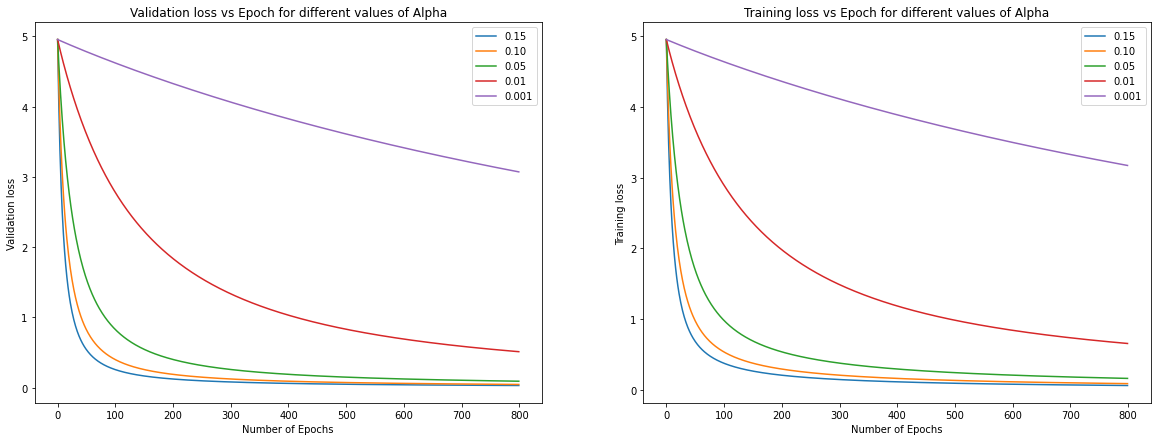

In [41]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(valid_loss5)
plt.plot(valid_loss4)
plt.plot(valid_loss3)
plt.plot(valid_loss2)
plt.plot(valid_loss1)
plt.legend(('0.15', '0.10', '0.05', '0.01','0.001'))
plt.xlabel('Number of Epochs')
plt.ylabel('Validation loss')
plt.title('Validation loss vs Epoch for different values of Alpha')

plt.subplot(1,2,2)
plt.plot(train_loss5)
plt.plot(train_loss4)
plt.plot(train_loss3)
plt.plot(train_loss2)
plt.plot(train_loss1)
plt.legend(('0.15', '0.10', '0.05', '0.01','0.001'))
plt.xlabel('Number of Epochs')
plt.ylabel('Training loss')
plt.title('Training loss vs Epoch for different values of Alpha')

Testing with chosen value of alpha and n_epoch

In [42]:
salpha_selected = 0.15
snepoch_selected = 400
train_loss, stheta_train = gradient_descent(snepoch_selected, salpha_selected, strain_X, strain_Y, sclasses)
predicted_speaker = prediction(stest_X, stheta_train)
evaluation(stest_Y, predicted_speaker)

Accuracy is:  95.4225352112676 %
Confusion Matrix is:
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 2 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         2
          10       1.00      1.00      1.00         2
          11       0.67      1.00      0.80         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14   